# VGGish - Speech Commands - XGBoost Modeling
Using the generated embeddings, this file trains and evaluates an XGBoost model


In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('wavfile_embed.csv', index_col=0)
df.head()

,file_name,label,valid,e0,e1,e2,e3,e4,e5,e6,...,e118,e119,e120,e121,e122,e123,e124,e125,e126,e127
0,/home/ubuntu/audio/speech_commands/zero/8a90cf...,zero,True,0.000000,0.0,0.575637,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.098917,0.3974,0.000000,0.000000,0.000000,0.080007,0.0
1,/home/ubuntu/audio/speech_commands/zero/173ae7...,zero,True,0.813162,0.0,0.280367,0.0,0.006822,0.0,0.0,...,0.0,0.072240,0.0,0.000000,0.0000,1.272675,0.463936,0.000000,0.018412,0.0
2,/home/ubuntu/audio/speech_commands/zero/eb76bc...,zero,True,0.701961,0.0,0.114244,0.0,0.000000,0.0,0.0,...,0.0,0.084316,0.0,0.000000,0.0000,0.571525,0.000000,0.838637,0.160843,0.0
3,/home/ubuntu/audio/speech_commands/zero/978240...,zero,True,0.751647,0.0,0.163232,0.0,0.000000,0.0,0.0,...,0.0,0.623571,0.0,0.000000,0.0000,0.692807,0.924771,0.304728,0.000000,0.0
4,/home/ubuntu/audio/speech_commands/zero/246328...,zero,True,1.115380,0.0,0.111188,0.0,0.000000,0.0,0.0,...,0.0,0.141433,0.0,0.000000,0.0000,0.760137,0.021478,0.095431,0.000000,0.0


In [3]:
df[~df.valid].head()

,file_name,label,valid,e0,e1,e2,e3,e4,e5,e6,...,e118,e119,e120,e121,e122,e123,e124,e125,e126,e127
26,/home/ubuntu/audio/speech_commands/zero/d1bf40...,zero,False,0.0,0.0,0.117188,0.0,0.119399,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.075857,0.156685,0.0,0.348233,0.0
59,/home/ubuntu/audio/speech_commands/zero/8b367d...,zero,False,0.0,0.0,0.117188,0.0,0.119399,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.075857,0.156685,0.0,0.348233,0.0
99,/home/ubuntu/audio/speech_commands/zero/88d009...,zero,False,0.0,0.0,0.117188,0.0,0.119399,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.075857,0.156685,0.0,0.348233,0.0
113,/home/ubuntu/audio/speech_commands/zero/4f5580...,zero,False,0.0,0.0,0.117188,0.0,0.119399,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.075857,0.156685,0.0,0.348233,0.0
128,/home/ubuntu/audio/speech_commands/zero/ff63ab...,zero,False,0.0,0.0,0.117188,0.0,0.119399,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.075857,0.156685,0.0,0.348233,0.0


In [4]:
df = df[df.valid]

In [5]:
df.shape

(96826, 131)

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['label'])

In [7]:
X = df.loc[:, [f'e{i}' for i in range(128)]].to_numpy()

In [8]:
X.shape, y.shape

((96826, 128), (96826,))

In [9]:
import xgboost as xgb

In [10]:
clf = xgb.XGBClassifier()

In [11]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix

# y_pred = cross_val_predict(clf, X, y, cv=3)
# conf_mat = confusion_matrix(y, y_pred)

In [12]:
from sklearn.metrics import plot_confusion_matrix

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, 
                                                    test_size=0.1, stratify=df.label)

In [15]:
y_train.shape, y_test.shape

((87143,), (9683,))

In [16]:
%%time 

clf.fit(X_train, y_train)

CPU times: user 2h 58min 12s, sys: 59.6 s, total: 2h 59min 12s
Wall time: 3min 8s


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
y_pred = clf.predict(X_test)

In [19]:
accuracy_score(y_test, y_pred)

0.1835175049055045

In [20]:
import matplotlib.pyplot as plt

In [21]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, accuracy_score

y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)
cm = confusion_matrix(y_test_labels, y_pred_labels)

In [22]:
import seaborn as sns
import numpy as np

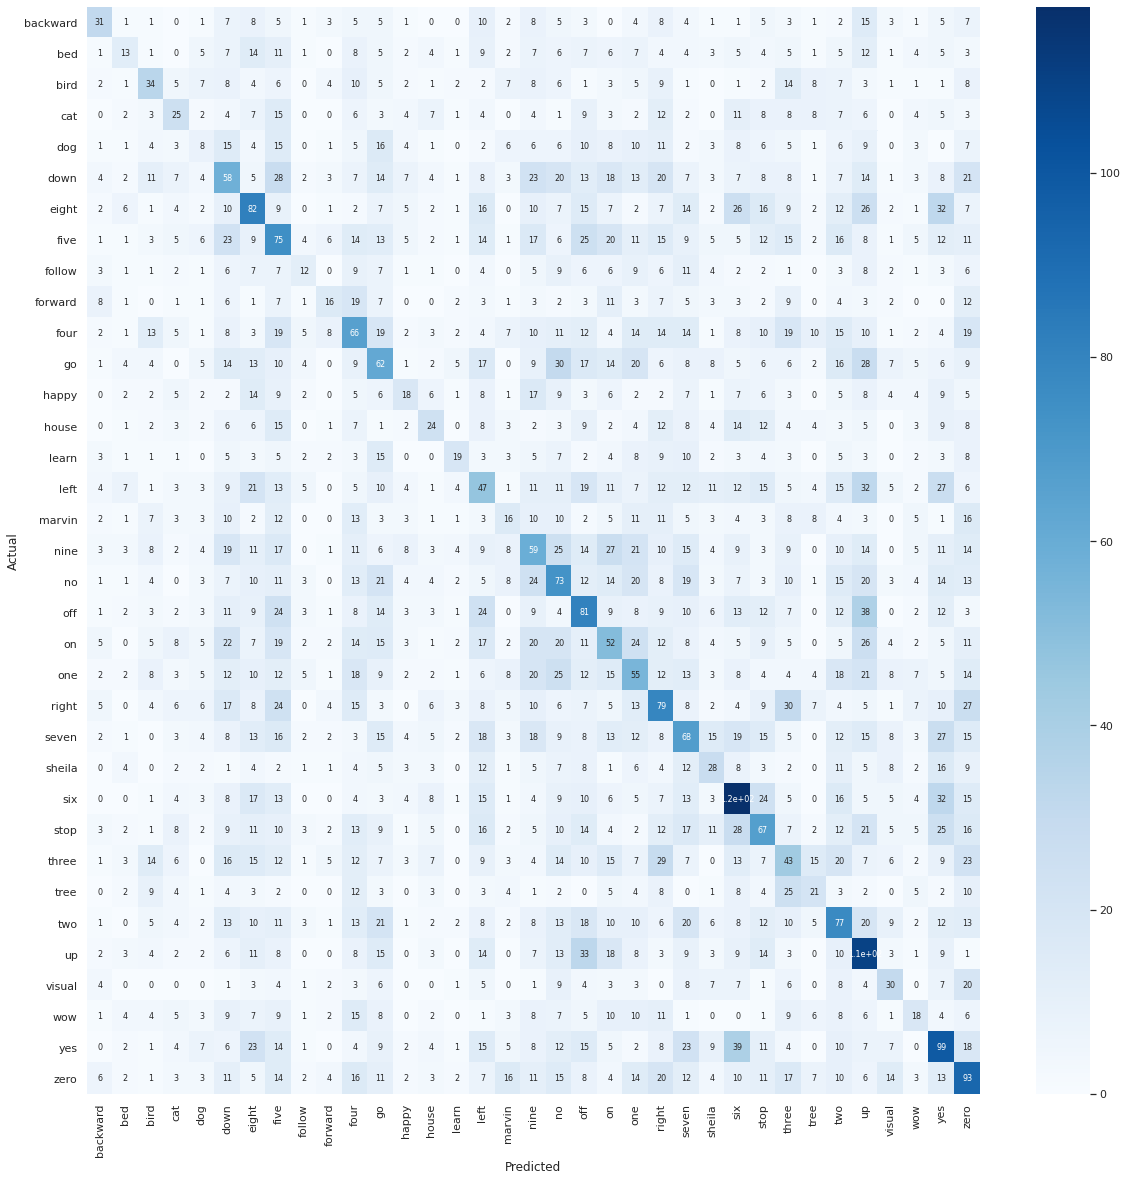

In [23]:
df_cm = pd.DataFrame(cm, columns=np.unique(y_test_labels), index = np.unique(y_test_labels))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (20,20))
sns.set(font_scale=1)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 8})# font size
